# **About Project**

## **About dataset**

In [ ]:
# This case study aims to give us an idea of applying EDA in a real business scenario.
# In this case study, apart from applying the techniques that we have learnt in the EDA module,
# we will also develop a basic understanding of risk analytics in banking and financial services and
# understand how data is used to minimise the risk of losing money while lending to customers.


## **Objectives**

In [ ]:
# 1.	Feature Selection
# 2.	Feature Engineering
# 3.	Missing value imputation
# 4.	Binning
# 5.	Variable Derivation
# 6.	Variables segmentation
# 7.	Data Exploration
# 8.	Behaviour observation
# 9.	Insight Derivation
# 10.	Visualization


# **Import Pakages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Datasets**

In [2]:
app = pd.read_csv("/content/application_data.csv")
prev_app = pd.read_csv("/content/previous_application.csv")

# **Feature Selection**

## Data Exploration

In [3]:
# Get first 10 row
app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get Columns names
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
# Get shape of data
app.shape

(23282, 122)

In [6]:
# Get null value
app.isnull().sum().sort_values()

SK_ID_CURR                        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
                              ...  
NONLIVINGAPARTMENTS_AVG       16169
NONLIVINGAPARTMENTS_MODE      16169
COMMONAREA_MEDI               16300
COMMONAREA_MODE               16300
COMMONAREA_AVG                16300
Length: 122, dtype: int64

In [7]:
# Make diffrent missing info table
missing_info = pd.DataFrame(app.isnull().sum().sort_values().reset_index())

# Rename missing info
missing_info.rename(columns = {"index": "col_name",0:"null_count"},inplace = True)

#Print missing info
missing_info

,col_name,null_count
0,SK_ID_CURR,0
1,DAYS_ID_PUBLISH,0
2,DAYS_EMPLOYED,0
3,DAYS_BIRTH,0
4,REGION_POPULATION_RELATIVE,0
...,...,...
117,NONLIVINGAPARTMENTS_AVG,16169
118,NONLIVINGAPARTMENTS_MODE,16169
119,COMMONAREA_MEDI,16300
120,COMMONAREA_MODE,16300


In [8]:
# find null count
missing_info["missing_percentage"]= missing_info["null_count"]/app.shape[0]*100

# Print
missing_info

,col_name,null_count,missing_percentage
0,SK_ID_CURR,0,0.000000
1,DAYS_ID_PUBLISH,0,0.000000
2,DAYS_EMPLOYED,0,0.000000
3,DAYS_BIRTH,0,0.000000
4,REGION_POPULATION_RELATIVE,0,0.000000
...,...,...,...
117,NONLIVINGAPARTMENTS_AVG,16169,69.448501
118,NONLIVINGAPARTMENTS_MODE,16169,69.448501
119,COMMONAREA_MEDI,16300,70.011167
120,COMMONAREA_MODE,16300,70.011167


In [9]:
# Export files
missing_info.to_csv("Missing_info_Data.csv", index = False)

In [10]:
# Arrange missing value

missing_col = missing_info[missing_info["missing_percentage"]>= 40]["col_name"].to_list()
missing_col

['EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'HOUSETYPE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'EXT_SOURCE_1',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'OWN_CAR_AGE',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'COMMON

In [11]:
# Removed missing value dataset

app_rmv = app.drop(labels = missing_col, axis =1 )

app_rmv.shape

(23282, 73)

In [12]:
# Flag

flag_col = []

for col in app_rmv.columns:
  if col.startswith("FLAG_"):
    flag_col.append(col)

flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [13]:
# Length of flag col
len(flag_col)

28

In [14]:
# flag columns and target

app_rmv[flag_col+["TARGET"]]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Y,Y,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23277,N,Y,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23278,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23279,N,N,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23280,N,Y,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
# flag column and target data
flagtar_col = app_rmv[flag_col+["TARGET"]]

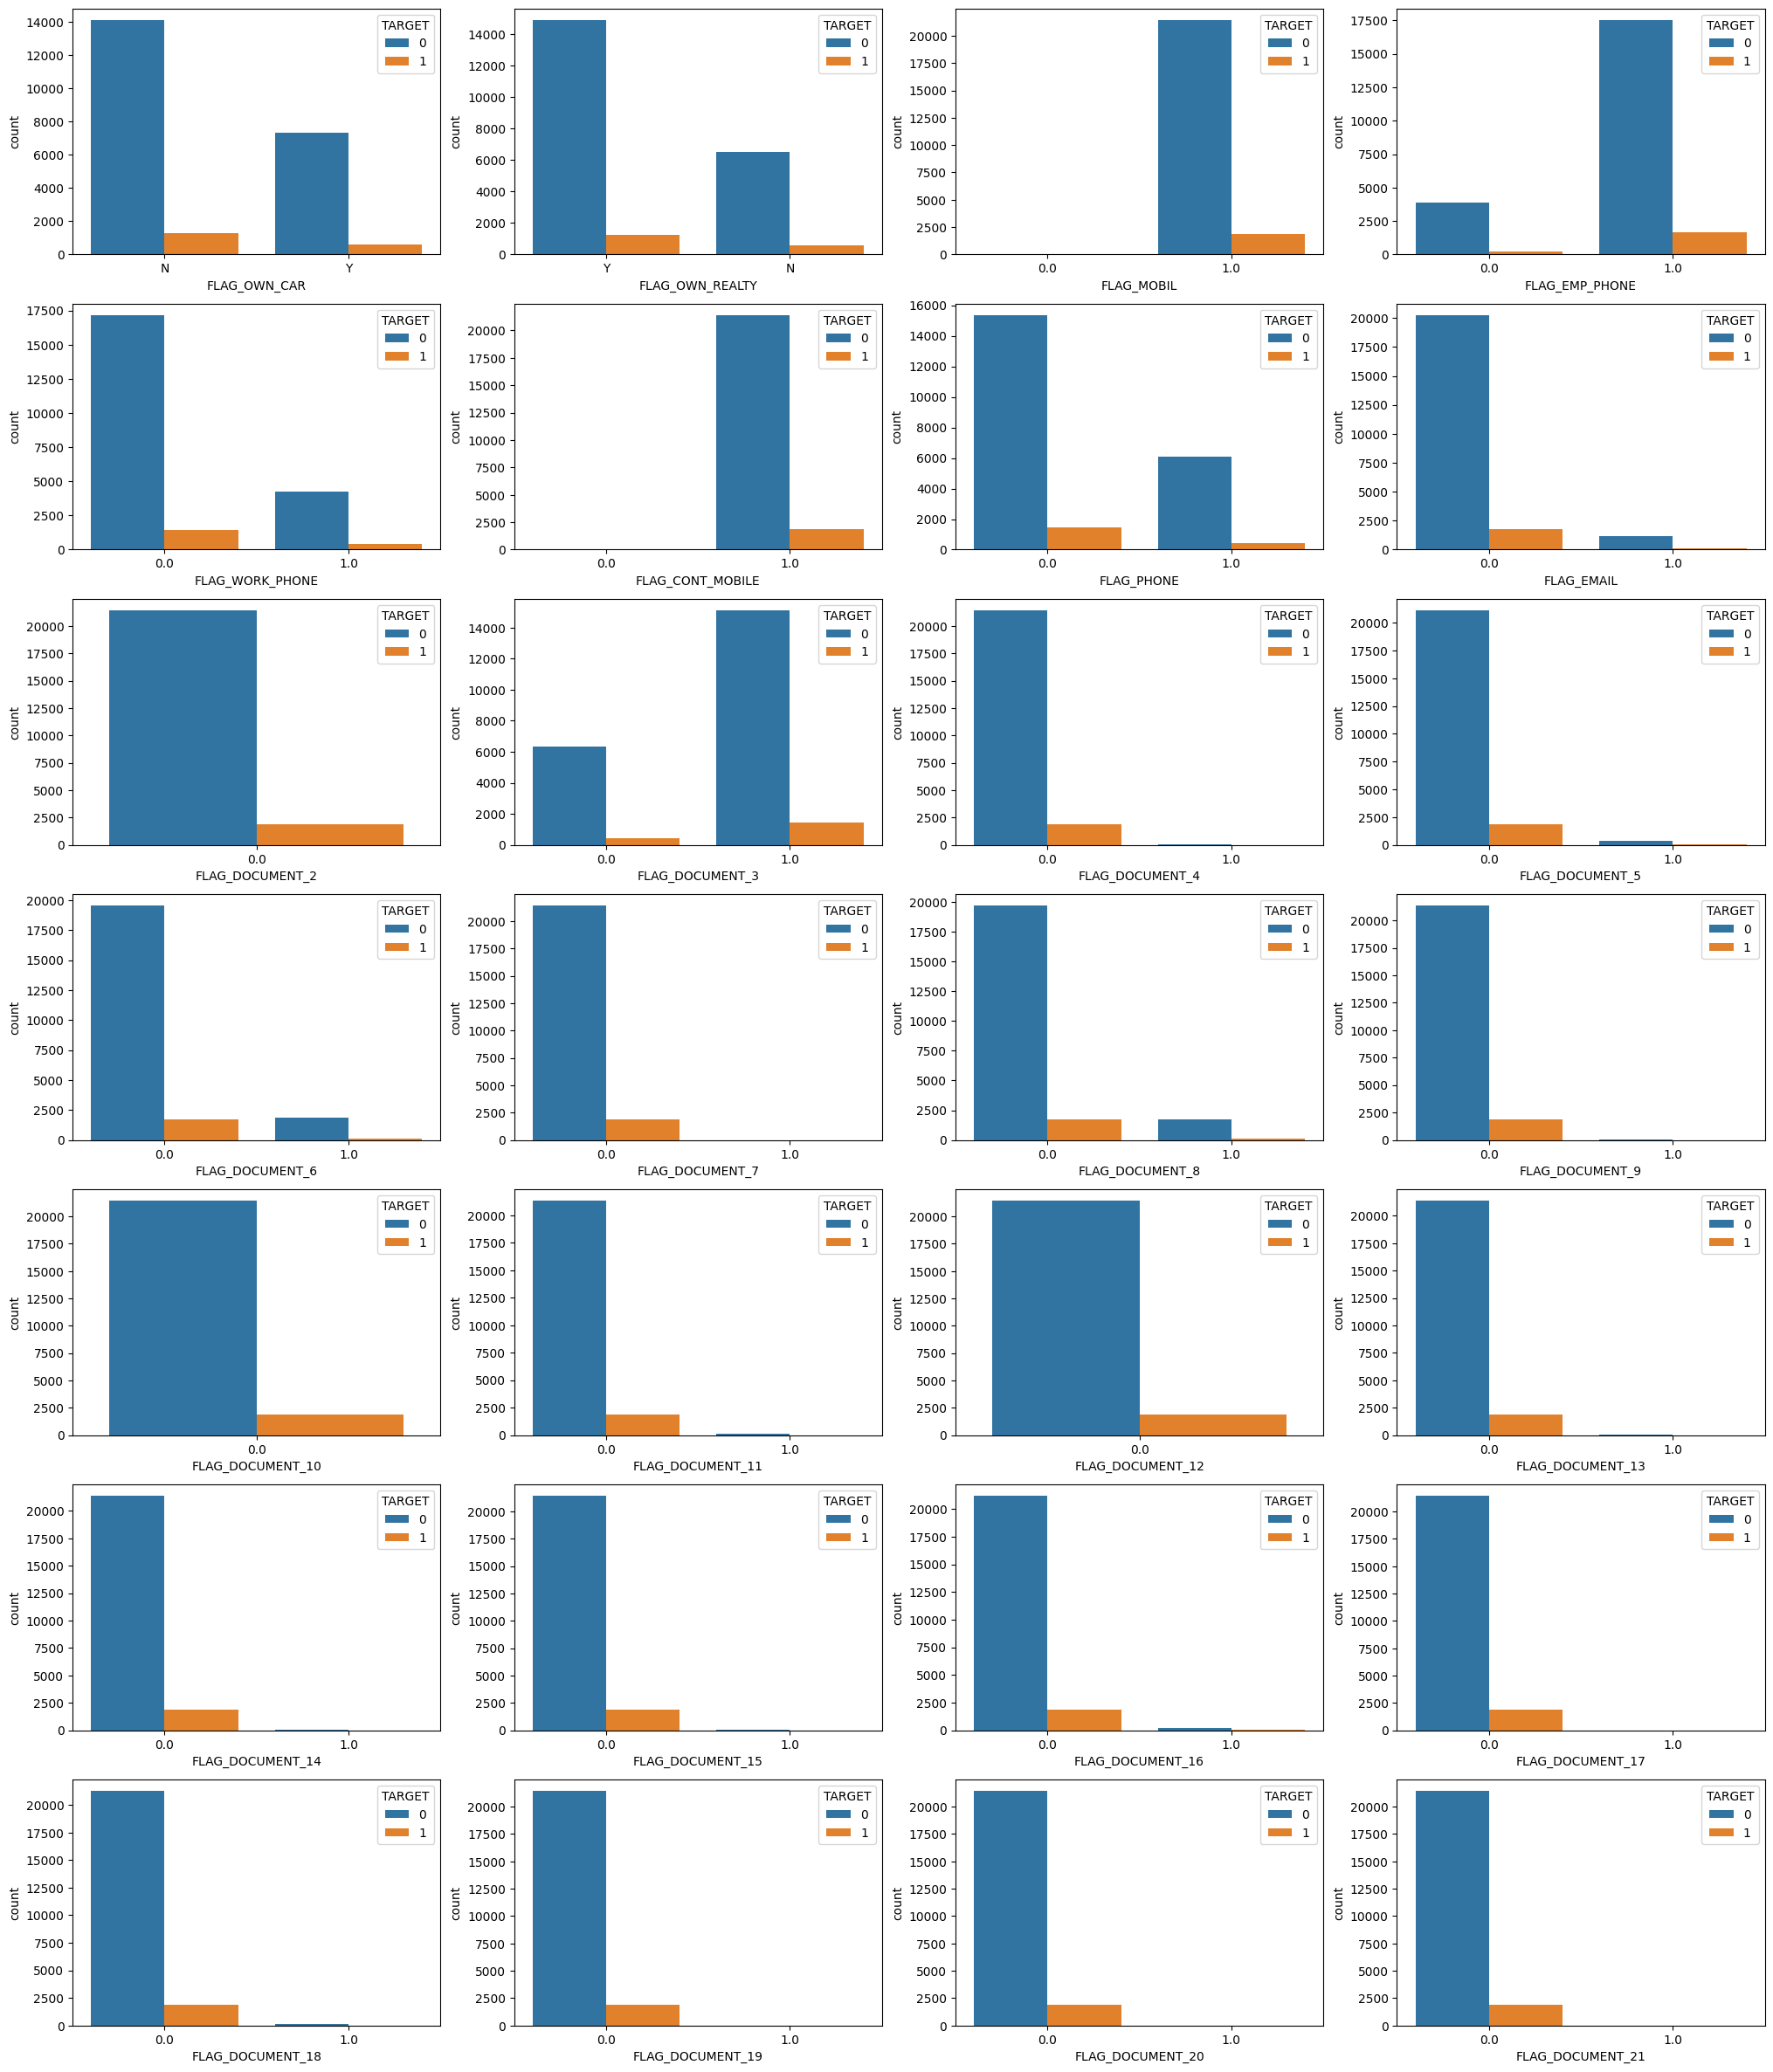

In [16]:
# visualize
plt.figure(figsize = (25,30))

for i, col in enumerate(flag_col):
  plt.subplot(7,4,i+1)
  sns.countplot(data = flagtar_col, x = col, hue = "TARGET")

In [17]:
# specific flag columns
flag_corr = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']

# remaning columns
flag_corr_df = app_rmv[flag_corr]

# Get correnation
corr_df = round(flag_corr_df.corr(),2)

#print
corr_df

<ipython-input-17-72b4debd31a2>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = round(flag_corr_df.corr(),2)


,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,-0.0,1.00,0.23,-0.01,-0.03,0.07,0.04
FLAG_WORK_PHONE,0.0,0.23,1.00,0.02,0.29,-0.01,0.02
FLAG_CONT_MOBILE,-0.0,-0.01,0.02,1.00,-0.00,-0.02,0.01
FLAG_PHONE,0.0,-0.03,0.29,-0.00,1.00,0.01,-0.03
FLAG_EMAIL,0.0,0.07,-0.01,-0.02,0.01,1.00,0.01
TARGET,0.0,0.04,0.02,0.01,-0.03,0.01,1.00


<Axes: >

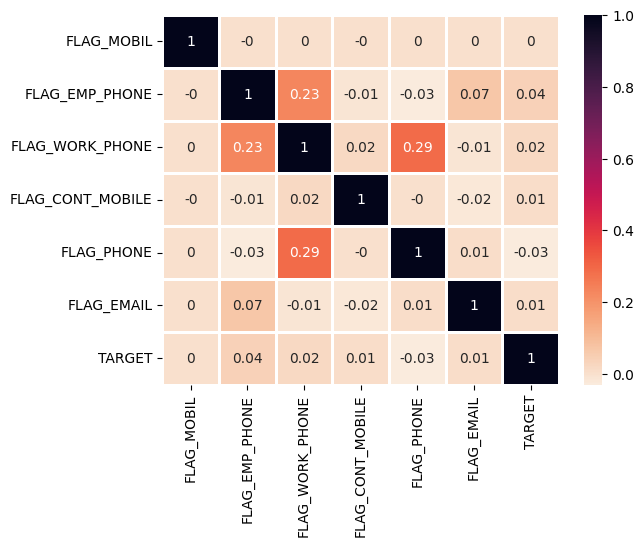

In [18]:
# heatmap

sns.heatmap(corr_df, cmap= 'rocket_r', linewidth = 1, annot = True)

In [19]:
# flag car group by count

flag_corr_df.groupby(["FLAG_OWN_CAR"]).size()

FLAG_OWN_CAR
N    15373
Y     7909
dtype: int64

In [20]:
# replace value

flag_corr_df["FLAG_OWN_CAR"] = flag_corr_df["FLAG_OWN_CAR"].replace({'N': 0,'Y':1})
flag_corr_df["FLAG_OWN_REALTY"] = flag_corr_df["FLAG_OWN_REALTY"].replace({'N': 0,'Y':1})

flag_corr_df.groupby(["FLAG_OWN_CAR"]).size()

<ipython-input-20-2323f2696213>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df["FLAG_OWN_CAR"] = flag_corr_df["FLAG_OWN_CAR"].replace({'N': 0,'Y':1})
<ipython-input-20-2323f2696213>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df["FLAG_OWN_REALTY"] = flag_corr_df["FLAG_OWN_REALTY"].replace({'N': 0,'Y':1})


FLAG_OWN_CAR
0    15373
1     7909
dtype: int64

In [21]:
# remove flag columns

app_flag_r = app_rmv.drop(labels = flag_col,axis = 1)

# shape of app_flag_r
app_flag_r.shape

(23282, 45)

In [22]:
# top 5 row of app_flag_r
app_flag_r.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Removing scores
app_scr = app_flag_r.drop(["EXT_SOURCE_2","EXT_SOURCE_3"],axis = 1)

# shape of App_scr
app_scr.shape


(23282, 43)

# **Feature Enginearring**

In [25]:
# Find null value
app_scr.isnull().sum().sort_values()

SK_ID_CURR                        0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
AMT_ANNUITY                       0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
TARGET                            0
ORGANIZATION_TYPE                 1
REG_REGION_NOT_WORK_REGION        1
REG_CITY_NOT_WORK_CITY            1
REG_CITY_NOT_LIVE_CITY            1
LIVE_REGION_NOT_WORK_REGION       1
LIVE_CITY_NOT_WORK_CITY           1
REG_REGION_NOT_LIVE_REGION        1
REGION_RATING_CLIENT              1
WEEKDAY_APPR_PROCESS_START        1
REGION_RATING_CLIENT_W_CITY       1
CNT_FAM_MEMBERS             

# **Missing Value Imputation**

In [26]:
# group by

app_scr.groupby("CNT_FAM_MEMBERS").size()

CNT_FAM_MEMBERS
1.0      5011
2.0     12104
3.0      4024
4.0      1823
5.0       277
6.0        31
7.0         7
8.0         2
9.0         1
10.0        1
dtype: int64

In [27]:
# find mode

app_scr["CNT_FAM_MEMBERS"] = app_scr["CNT_FAM_MEMBERS"].fillna((app_scr["CNT_FAM_MEMBERS"].mode()[0]))

In [28]:
# find null value

app_scr["CNT_FAM_MEMBERS"].isnull().sum()

0

In [29]:
# group by occupation

app_scr.groupby("OCCUPATION_TYPE").size().sort_values()

OCCUPATION_TYPE
IT staff                   41
HR staff                   46
Realty agents              68
Waiters/barmen staff       92
Secretaries               103
Low-skill Laborers        189
Private service staff     223
Cleaning staff            343
Cooking staff             446
Security staff            515
Medicine staff            673
Accountants               743
High skill tech staff     877
Drivers                  1407
Managers                 1566
Core staff               2097
Sales staff              2461
Laborers                 4144
dtype: int64

In [30]:
# fill null

app_scr["OCCUPATION_TYPE"] = app_scr["OCCUPATION_TYPE"].fillna((app_scr["OCCUPATION_TYPE"].mode()[0]))

In [31]:
# null value

app_scr["OCCUPATION_TYPE"].isnull().sum()

0

In [32]:
# group by name type

app_scr.groupby("NAME_TYPE_SUITE").size()

NAME_TYPE_SUITE
Children             261
Family              3063
Group of people       20
Other_A               52
Other_B              122
Spouse, partner      853
Unaccompanied      18813
dtype: int64

In [33]:
# find mode of name_type_suit

app_scr["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [34]:
# fill null value by mode value

app_scr["NAME_TYPE_SUITE"] = app_scr["NAME_TYPE_SUITE"].fillna((app_scr["NAME_TYPE_SUITE"].mode()[0]))

In [35]:
# find null vaule count

app_scr["NAME_TYPE_SUITE"].isnull().sum()

0

## Missing value

In [49]:
# description of amt_annuity

app_scr["AMT_ANNUITY"].describe()

count     23282.000000
mean      27134.236535
std       14607.498468
min        2052.000000
25%       16456.500000
50%       24986.250000
75%       34720.875000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [50]:
# fill null value with mode

app_scr["AMT_ANNUITY"] = app_scr["AMT_ANNUITY"].fillna((app_scr["AMT_ANNUITY"].mode()))

In [51]:
# find null value

app_scr["AMT_ANNUITY"].isnull().sum()

0

In [52]:
# find all amt_req_credit value at once

amount_req_col = []

for col in app_scr.columns:
  if col.startswith("AMT_REQ_CREDIT_BUREAU"):
    amount_req_col.append(col)


amount_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [53]:
# fill null value with median for all amt_req_credit at once

for col in amount_req_col:
  app_scr[col] = app_scr[col].fillna((app_scr[col].median()))


In [54]:
# find null value

app_scr[col].isnull().sum()

0

In [55]:
# find null value

app_scr["AMT_GOODS_PRICE"].isnull().sum()

0

In [56]:
# Aggregates of amt_goods_price

app_scr["AMT_GOODS_PRICE"].agg(["min","max", "median"])

min         45000.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [57]:
# fill null vaule by mode

app_scr["AMT_GOODS_PRICE"] = app_scr["AMT_GOODS_PRICE"].fillna((app_scr["AMT_GOODS_PRICE"].mode()[0]))

In [58]:
# find null value

app_scr["AMT_GOODS_PRICE"].isnull().sum()

0

In [59]:
# group all days columns in days_col

days_col = []

for col in app_scr.columns:
  if col.startswith("DAYS"):
    days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [60]:
# convert negative num into positive

for col in days_col:
  app_scr[col] = abs(app_scr[col])

In [61]:
# find length of app_scr

len(app_scr.columns)

43

## Outlier Detection & Treatment

In [62]:
# description of amt_goods_price

app_scr["AMT_GOODS_PRICE"].describe()

count    2.328200e+04
mean     5.394704e+05
std      3.697315e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [63]:
# find aggregate of amt_goods_price

app_scr["AMT_GOODS_PRICE"].agg(["min","max","median"])

min         45000.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

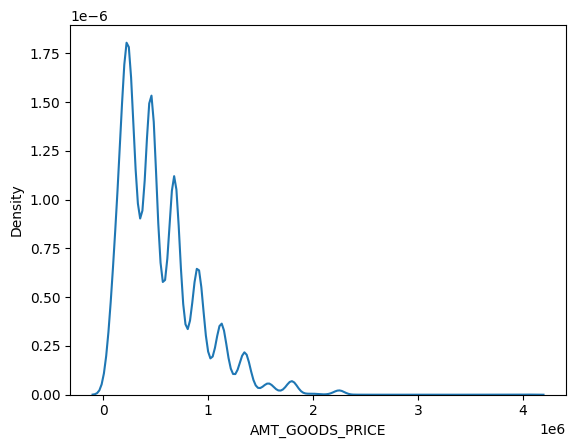

In [64]:
# visualize kdeplot of amt_goods_price

sns.kdeplot(data= app_scr, x= "AMT_GOODS_PRICE")

<Axes: xlabel='AMT_GOODS_PRICE'>

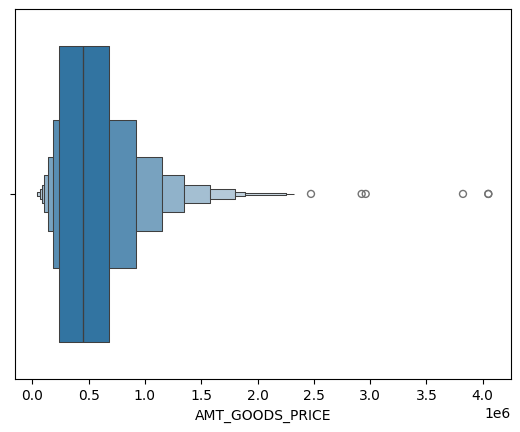

In [65]:
# visualize boxplot of amt_goods_price

sns.boxenplot(data= app_scr, x= "AMT_GOODS_PRICE")

# **Binning**

In [67]:
# find quartile of amt_goods_price

app_scr["AMT_GOODS_PRICE"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1     180000.0
0.2     225000.0
0.3     270000.0
0.4     382500.0
0.5     450000.0
0.6     535500.0
0.7     675000.0
0.8     823500.0
0.9    1084500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [68]:
# find max value amt_goods_price

app_scr["AMT_GOODS_PRICE"].max()

4050000.0

In [69]:
# grouping values

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,2961000]
ranges = ["0-100k","100k-200k","200k-300k","300k-400k","400k-500k","500k-600k","600k-700k","700k-800k","800k-900k","900k-Above"]

app_scr["AMT_GOODS_PRICE_RANGE"] = pd.cut(app_scr["AMT_GOODS_PRICE"], bins, labels = ranges)

In [70]:
# print amt_goods_price range

app_scr.groupby(["AMT_GOODS_PRICE_RANGE"]).size()

AMT_GOODS_PRICE_RANGE
0-100k         673
100k-200k     2496
200k-300k     4682
300k-400k     1602
400k-500k     4342
500k-600k      991
600k-700k     3021
700k-800k      618
800k-900k     1673
900k-Above    3181
dtype: int64

In [71]:
# find quartile of amt_income_total

app_scr["AMT_INCOME_TOTAL"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    146475.0
0.60    162000.0
0.70    184500.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [72]:
# find max value of amt_income_total

app_scr["AMT_INCOME_TOTAL"].max()

117000000.0

In [73]:
# grouping value of amt_income_total

bins = [0,100000,150000,200000,250000,300000,350000,400000,1935000,]
ranges = ["0-100k","100k-150k","150k-200k","200k-250k","250k-300k","300k-350k","350k-400k","400k-Above"]

app_scr["AMT_INCOME_TOTAL_RANGE"] = pd.cut(app_scr["AMT_INCOME_TOTAL"], bins, labels = ranges)

In [74]:
# print value of amt_income_total_range

app_scr.groupby(["AMT_INCOME_TOTAL_RANGE"]).size()

AMT_INCOME_TOTAL_RANGE
0-100k        4903
100k-150k     6856
150k-200k     4828
200k-250k     3646
250k-300k     1314
300k-350k      666
350k-400k      460
400k-Above     606
dtype: int64

In [75]:
# find quartile of amt_credit

app_scr["AMT_CREDIT"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.000
0.20     254700.000
0.30     312768.000
0.40     438084.000
0.50     516069.000
0.60     607845.600
0.70     755190.000
0.80     900000.000
0.90    1132573.500
0.99    1823477.625
Name: AMT_CREDIT, dtype: float64

In [76]:
# # find max value of amt_credit

app_scr["AMT_CREDIT"].max()

4050000.0

In [77]:
# group value of amt_credit

bins = [0,300000,600000,900000,1200000,1500000,1800000,2961000]
ranges = ["0-300k","300k-600k","600k-900k","900k-1200k","1200k-1500k","1500k-1800k","1800k-Above"]

app_scr["AMT_CREDIT_RANGE"] = pd.cut(app_scr["AMT_CREDIT"], bins, labels = ranges)

In [78]:
# print  value of amt_credit_range

app_scr.groupby(["AMT_CREDIT_RANGE"]).size()

AMT_CREDIT_RANGE
0-300k         6831
300k-600k      7027
600k-900k      4916
900k-1200k     2398
1200k-1500k    1332
1500k-1800k     539
1800k-Above     236
dtype: int64

In [79]:
# find quartile of amt_annuity

app_scr["AMT_ANNUITY"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10966.50
0.20    14638.50
0.30    18211.50
0.40    21906.00
0.50    24986.25
0.60    28179.00
0.70    32067.00
0.80    37638.00
0.90    46042.65
0.99    69781.50
Name: AMT_ANNUITY, dtype: float64

In [80]:
# find max value of amt_annuity

app_scr["AMT_ANNUITY"].max()

258025.5

In [81]:
# group value of amt_annuity

bins = [0,10000,20000,30000,40000,50000,60000,70000,135936,]
ranges = ["0-100k","100k-200k","200k-300k","300k-400k","400k-500k","500k-600k","600k-700k","700k-Above"]

app_scr["AMT_ANNUITY_RANGE"] = pd.cut(app_scr["AMT_ANNUITY"], bins, labels = ranges)

In [82]:
# print value of amt_annuity_range

app_scr.groupby(["AMT_ANNUITY_RANGE"]).size()

AMT_ANNUITY_RANGE
0-100k        1799
100k-200k     6207
200k-300k     7011
300k-400k     4449
400k-500k     2220
500k-600k      972
600k-700k      396
700k-Above     221
dtype: int64

In [83]:
# find quartile of days_employed

app_scr["DAYS_EMPLOYED"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       385.0
0.20       742.0
0.30      1140.0
0.40      1598.0
0.50      2209.5
0.60      3032.6
0.70      4434.0
0.80      8929.4
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [84]:
# find max value of days_employed

app_scr["DAYS_EMPLOYED"].max()

365243

In [85]:
# group value of days_employed

bins = [0,1825, 3650, 5475, 7300, 9125, 10950, 12775, 14600, 16425, 18250, 365243]
ranges = ['0-5Y', '5Y-10Y', '10Y-15Y', '15Y-20Y', '20Y-25Y', '25Y-30Y', '30Y-35Y', '35Y-40Y', '40Y-45Y', '45Y-50Y', 'Above 50Y']

app_scr["DAYS_EMPLOYED_RANGE"] = pd.cut(app_scr["DAYS_EMPLOYED"], bins, labels = ranges)

In [86]:
# print value of days_employed_range

app_scr.groupby(["DAYS_EMPLOYED_RANGE"]).size()

DAYS_EMPLOYED_RANGE
0-5Y         10317
5Y-10Y        4901
10Y-15Y       2080
15Y-20Y        853
20Y-25Y        510
25Y-30Y        256
30Y-35Y        154
35Y-40Y         69
40Y-45Y         13
45Y-50Y          0
Above 50Y     4129
dtype: int64

# **Data Analysis | Visualization**

In [156]:
# info about app_scr

app_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23282 entries, 0 to 23281
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   23282 non-null  int64   
 1   TARGET                       23282 non-null  int64   
 2   NAME_CONTRACT_TYPE           23282 non-null  object  
 3   CODE_GENDER                  23282 non-null  object  
 4   CNT_CHILDREN                 23282 non-null  int64   
 5   AMT_INCOME_TOTAL             23282 non-null  float64 
 6   AMT_CREDIT                   23282 non-null  float64 
 7   AMT_ANNUITY                  23282 non-null  float64 
 8   AMT_GOODS_PRICE              23282 non-null  float64 
 9   NAME_TYPE_SUITE              23282 non-null  object  
 10  NAME_INCOME_TYPE             23282 non-null  object  
 11  NAME_EDUCATION_TYPE          23282 non-null  object  
 12  NAME_FAMILY_STATUS           23282 non-null  object  
 13  N

In [157]:
# find app_scr datatypes

app_scr.dtypes.value_counts()

float64     27
object      10
int64        6
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [158]:
# find app_scr object datatype

app_scr.select_dtypes(include=["object"]).head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [159]:
obj_var = app_scr.select_dtypes(include=["object"]).columns

In [160]:
# Name contract type size

app_scr.groupby(["NAME_CONTRACT_TYPE"]).size()

NAME_CONTRACT_TYPE
Cash loans         21054
Revolving loans     2228
dtype: int64

**Univarient** **categorical**

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

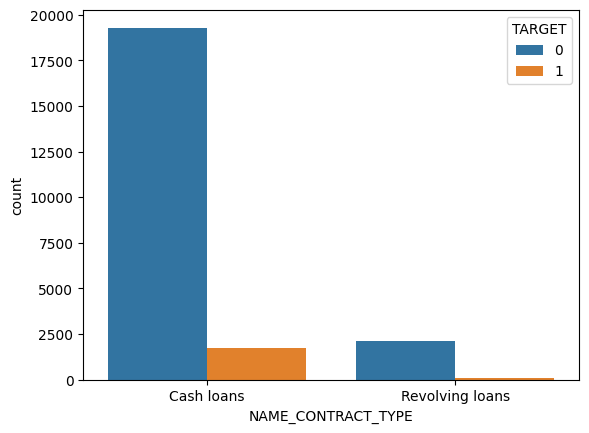

In [161]:
# countplot

sns.countplot(data= app_scr, x = "NAME_CONTRACT_TYPE", hue = "TARGET")

In [162]:
# find name contract type mean value

app_scr[["NAME_CONTRACT_TYPE","TARGET"]].groupby(["NAME_CONTRACT_TYPE"],as_index = False).mean()

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083642
1,Revolving loans,0.043537


In [163]:
# give name as data_pct

data_pct = app_scr[["NAME_CONTRACT_TYPE","TARGET"]].groupby(["NAME_CONTRACT_TYPE"],as_index = False).mean()

In [164]:
# genrate percentage column

data_pct["PCT"]= data_pct["TARGET"]*100

In [165]:
# print data_pct

data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083642,8.364206
1,Revolving loans,0.043537,4.353680


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

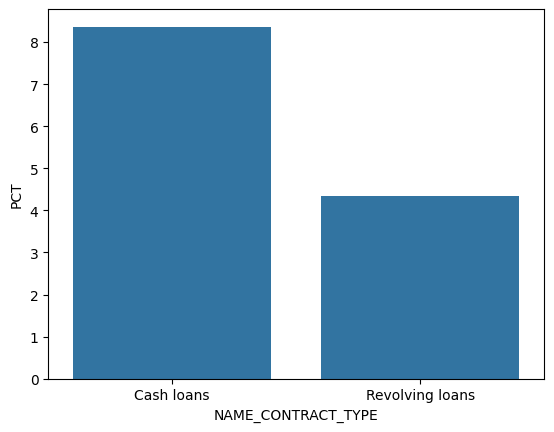

In [166]:
# barplot

sns.barplot(data= data_pct, x = "NAME_CONTRACT_TYPE", y="PCT")

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

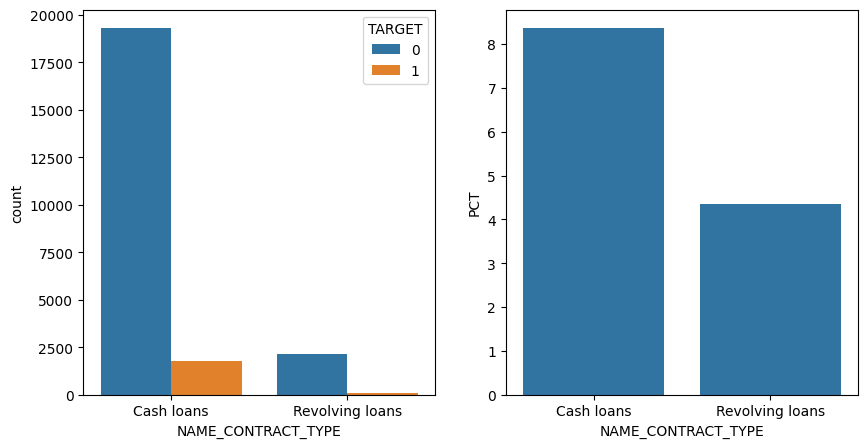

In [167]:
# combined graph

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(data= app_scr, x = "NAME_CONTRACT_TYPE", hue = "TARGET")

plt.subplot(1,2,2)
sns.barplot(data= data_pct, x = "NAME_CONTRACT_TYPE", y="PCT")

<ipython-input-168-f0b49dea3f7a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data_pct, x = var, y="PCT", palette = "rocket_r")
<ipython-input-168-f0b49dea3f7a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data_pct, x = var, y="PCT", palette = "rocket_r")
<ipython-input-168-f0b49dea3f7a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data_pct, x = var, y="PCT", palette = "rocket_r")
<ipython-input-168-f0b49dea3f7a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

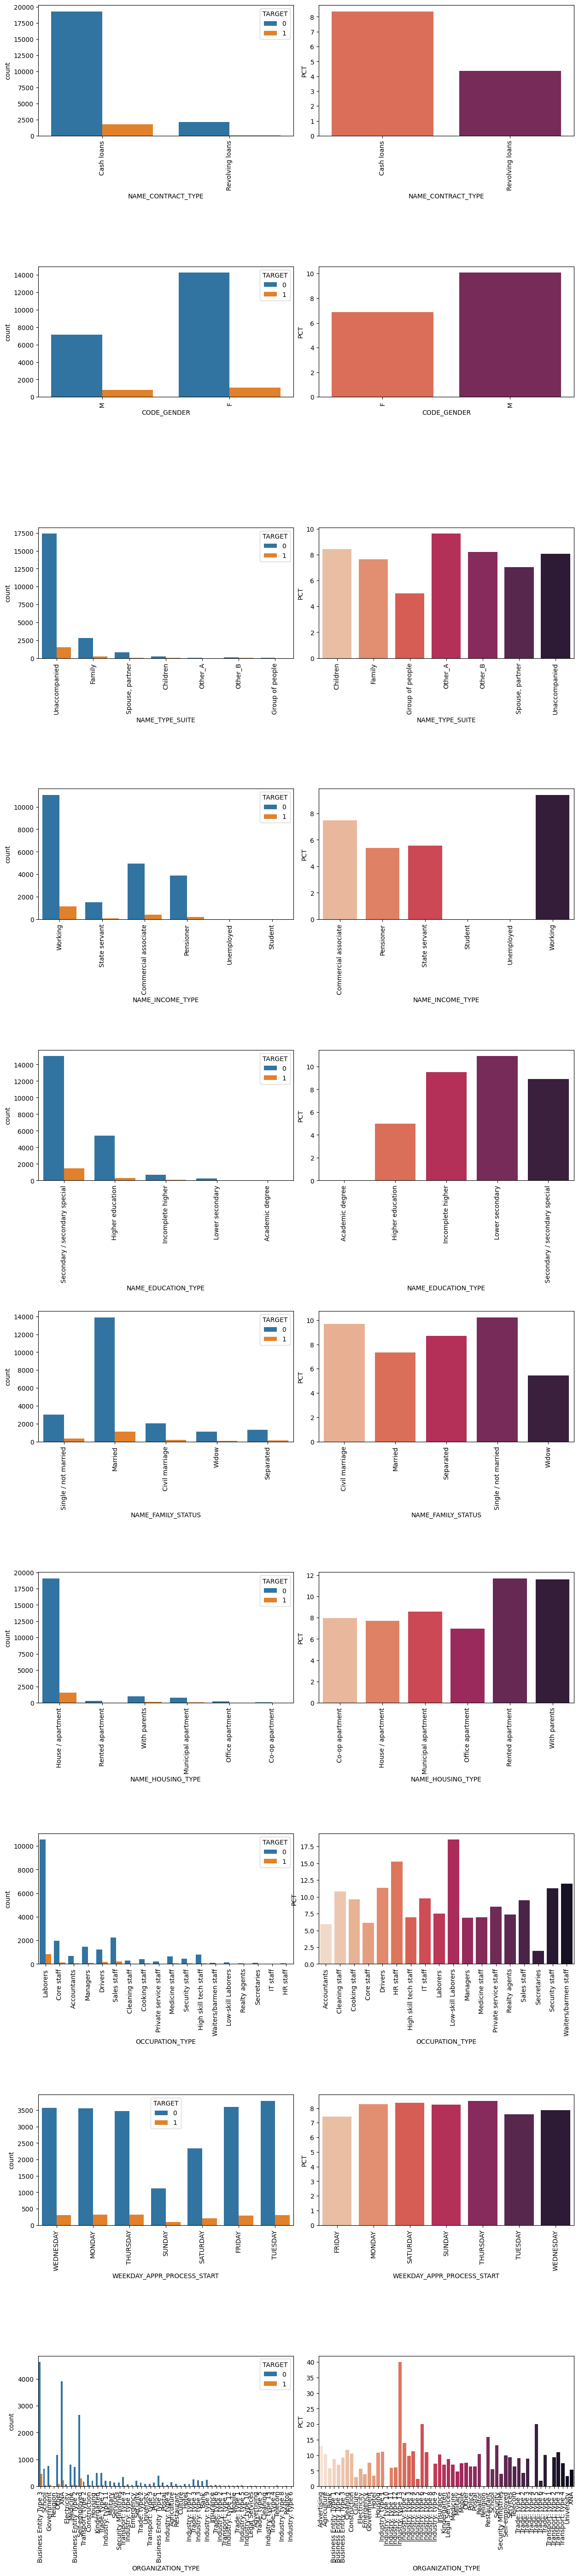

In [168]:
# combined graph of data_pct

plt.figure(figsize = (15,70))

for i, var in enumerate (obj_var):

  data_pct = app_scr[[var,"TARGET"]].groupby([var],as_index = False).mean()
  data_pct["PCT"]= data_pct["TARGET"]*100

  plt.subplot(10,2,i+i+1)
  plt.subplots_adjust(wspace =0.1, hspace = 1)
  sns.countplot(data= app_scr, x = var, hue = "TARGET")
  plt.xticks(rotation = 90)

  plt.subplot(10,2,i+i+2)
  plt.subplots_adjust(wspace =0.1, hspace = 1)
  sns.barplot(data= data_pct, x = var, y="PCT", palette = "rocket_r")
  plt.xticks(rotation = 90)




In [169]:
# find flot64 and int64 columns

num_var = app_scr.select_dtypes(include=["float64","int64"]).columns

# find flot64, int64  and category columns

num_catvar = app_scr.select_dtypes(include=["float64","int64","category"]).columns

In [170]:
# print num_var

num_var

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [171]:
# print top 5 row value of app_scr

app_scr[num_var].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
# name table as num_data

num_data = app_scr[num_var]

# print top 5 row

num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
# group by
num_data.groupby(["TARGET"]).size()/num_data.shape[0]*100

TARGET
0    92.019586
1     7.980414
dtype: float64

In [174]:
# name table as defaulters

defaulters = num_data[num_data["TARGET"]==1].drop(["TARGET"],axis = 1)

# print

defaulters

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23237,127036,0,81000.0,128092.5,10399.5,103500.0,0.002134,14881,738,661.0,...,1.0,2.0,1.0,743.0,0.0,0.0,0.0,0.0,0.0,1.0
23245,127045,0,247500.0,450000.0,22500.0,450000.0,0.028663,16149,766,4641.0,...,0.0,0.0,0.0,1940.0,0.0,0.0,0.0,0.0,0.0,1.0
23246,127046,1,180000.0,693301.5,29272.5,598500.0,0.010556,10897,1764,6.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23248,127048,2,202500.0,545157.0,29704.5,414000.0,0.018801,12827,463,3678.0,...,0.0,0.0,0.0,2021.0,0.0,0.0,0.0,0.0,0.0,3.0


In [175]:
# name table as Repayers

repayers = num_data[num_data["TARGET"]==0].drop(["TARGET"],axis = 1)

# print

repayers

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23277,127080,0,202500.0,592560.0,35937.0,450000.0,0.007120,11357,995,126.0,...,0.0,0.0,0.0,1781.0,0.0,0.0,0.0,0.0,0.0,0.0
23278,127081,1,90000.0,814041.0,26388.0,679500.0,0.035792,10581,3138,4869.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23279,127082,1,112500.0,808650.0,26217.0,675000.0,0.018801,11088,3646,5898.0,...,0.0,0.0,0.0,2576.0,0.0,0.0,0.0,0.0,0.0,0.0
23280,127084,1,810000.0,990432.0,58041.0,855000.0,0.019689,14843,4297,5176.0,...,0.0,2.0,0.0,1657.0,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
# name table as def_cor

def_cor = defaulters.corr()

# print

def_cor

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.012354,0.003588,0.044852,0.051525,0.048122,-0.028154,0.012441,-0.021389,0.028749,...,-0.020011,-0.006107,-0.014626,0.036446,-0.016370,0.005071,0.002057,-0.013675,-0.012126,0.030653
CNT_CHILDREN,-0.012354,1.000000,0.014897,0.014367,0.037958,0.003778,-0.005827,-0.259479,-0.193937,-0.157519,...,-0.036045,0.009439,-0.039494,-0.008427,0.004022,-0.054071,-0.027195,-0.021707,-0.002797,0.008731
AMT_INCOME_TOTAL,0.003588,0.014897,1.000000,0.008920,0.009770,0.005883,-0.013298,-0.011424,-0.012241,0.015882,...,-0.009809,-0.015674,-0.008336,-0.021878,-0.002487,-0.002536,-0.002692,-0.005556,-0.007509,-0.009866
AMT_CREDIT,0.044852,0.014367,0.008920,1.000000,0.752204,0.983099,0.093880,0.169147,0.030192,0.050987,...,-0.016689,0.049949,-0.030758,0.109293,-0.004934,-0.043640,0.020067,0.076827,0.003134,-0.010204
AMT_ANNUITY,0.051525,0.037958,0.009770,0.752204,1.000000,0.752688,0.093590,0.029759,-0.065130,-0.003259,...,-0.045913,0.019943,-0.052266,0.090318,0.007321,-0.038674,0.062217,0.067029,0.015085,0.006607
AMT_GOODS_PRICE,0.048122,0.003778,0.005883,0.983099,0.752688,1.000000,0.097726,0.165614,0.031962,0.045618,...,-0.013604,0.050669,-0.024962,0.116808,-0.005357,-0.038505,0.016713,0.070599,-0.006949,-0.015201
REGION_POPULATION_RELATIVE,-0.028154,-0.005827,-0.013298,0.093880,0.093590,0.097726,1.000000,0.021850,0.016281,0.022199,...,0.029673,0.020094,0.025799,0.033318,0.004977,0.005888,0.019807,0.095455,0.012424,0.049706
DAYS_BIRTH,0.012441,-0.259479,-0.011424,0.169147,0.029759,0.165614,0.021850,1.000000,0.581833,0.290546,...,0.013933,0.005894,0.026302,0.127274,-0.034834,0.033438,0.016397,0.011065,0.031933,0.098285
DAYS_EMPLOYED,-0.021389,-0.193937,-0.012241,0.030192,-0.065130,0.031962,0.016281,0.581833,1.000000,0.211737,...,0.020599,0.020039,0.014304,0.032747,0.020624,0.086293,0.006507,-0.026262,0.017346,0.016557
DAYS_REGISTRATION,0.028749,-0.157519,0.015882,0.050987,-0.003259,0.045618,0.022199,0.290546,0.211737,1.000000,...,-0.007264,0.006222,0.016267,0.057377,0.013628,0.000544,0.008604,0.007366,0.013058,0.035112


In [177]:
# privide name for table by remaning column heading

def_corru = def_cor.where(np.triu(np.ones(def_cor.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={"level_0":"var1","level_1": "var2", 0:"corr"})


In [178]:
# genrate absolute value

def_corru["corr"] = abs(def_corru["corr"])

In [179]:
# drop null value corr and arrenge in asending order

def_corru.dropna(subset=["corr"]).sort_values(by=["corr"], ascending = False)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998501
163,AMT_GOODS_PRICE,AMT_CREDIT,0.983099
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.947423
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892075
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.887411
...,...,...,...
916,AMT_REQ_CREDIT_BUREAU_WEEK,LIVE_CITY_NOT_WORK_CITY,0.000709
482,REG_REGION_NOT_LIVE_REGION,AMT_INCOME_TOTAL,0.000554
873,AMT_REQ_CREDIT_BUREAU_DAY,DAYS_REGISTRATION,0.000544
978,AMT_REQ_CREDIT_BUREAU_QRT,REG_CITY_NOT_LIVE_CITY,0.000093


In [180]:
# name table as rep_cor after genrating repayers correlation

rep_cor = repayers.corr()

# print

rep_cor

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.000547,0.005831,-0.003919,-0.000877,-0.004949,-0.007479,0.000704,-0.002472,-0.000588,...,-0.007781,0.004936,-0.008822,0.005206,0.000085,-0.006704,-0.005540,0.006732,-0.007103,0.000655
CNT_CHILDREN,-0.000547,1.000000,0.036930,0.004206,0.028089,-0.000132,-0.022437,-0.337994,-0.244728,-0.186853,...,0.002239,0.008472,0.002483,0.009899,-0.000708,-0.008294,0.004267,-0.011967,-0.009967,-0.033948
AMT_INCOME_TOTAL,0.005831,0.036930,1.000000,0.382128,0.452383,0.388324,0.188387,-0.068161,-0.154620,-0.056891,...,-0.033477,-0.025532,-0.033882,0.035416,0.013923,0.021189,0.015967,0.081105,0.014973,0.031632
AMT_CREDIT,-0.003919,0.004206,0.382128,1.000000,0.777988,0.986937,0.096357,0.059017,-0.070304,-0.004766,...,-0.010408,0.004319,-0.013929,0.061657,-0.001789,0.022311,0.014360,0.056179,0.024550,-0.027535
AMT_ANNUITY,-0.000877,0.028089,0.452383,0.777988,1.000000,0.782815,0.123246,-0.005758,-0.110556,-0.032130,...,-0.018425,-0.003027,-0.021558,0.053311,0.010846,0.017390,0.024066,0.029980,0.009741,0.000414
AMT_GOODS_PRICE,-0.004949,-0.000132,0.388324,0.986937,0.782815,1.000000,0.100880,0.056305,-0.068415,-0.009486,...,-0.012585,0.004711,-0.016260,0.065572,-0.000560,0.021310,0.015452,0.056991,0.025547,-0.030372
REGION_POPULATION_RELATIVE,-0.007479,-0.022437,0.188387,0.096357,0.123246,0.100880,1.000000,0.025805,-0.017172,0.067353,...,0.005841,-0.015491,0.000406,0.043619,-0.005458,0.008398,0.007847,0.081693,-0.007857,-0.000438
DAYS_BIRTH,0.000704,-0.337994,-0.068161,0.059017,-0.005758,0.056305,0.025805,1.000000,0.623780,0.338559,...,0.002093,-0.008422,0.003159,0.075030,-0.006987,0.001466,0.005553,-0.005767,0.011304,0.069930
DAYS_EMPLOYED,-0.002472,-0.244728,-0.154620,-0.070304,-0.110556,-0.068415,-0.017172,0.623780,1.000000,0.214103,...,0.017625,0.007811,0.020478,-0.028483,-0.008213,-0.000807,-0.010780,-0.036206,0.011583,0.042769
DAYS_REGISTRATION,-0.000588,-0.186853,-0.056891,-0.004766,-0.032130,-0.009486,0.067353,0.338559,0.214103,1.000000,...,-0.011165,-0.013147,-0.011666,0.050419,0.000826,0.003633,0.001002,0.013211,-0.012617,0.018935


In [181]:
# privide name for table by remaning column heading

rep_corru = rep_cor.where(np.triu(np.ones(rep_cor.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={"level_0":"var1","level_1": "var2", 0:"corr"})

# print

rep_corru

,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN
...,...,...,...
1019,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,0.008470
1020,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,0.029896
1021,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,0.010111
1022,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,0.115707


In [182]:
# provide absolute value for corr

rep_corru["corr"] = abs(rep_corru["corr"])

In [183]:
# drop corr and sort data in asending order

rep_corru.dropna(subset=["corr"]).sort_values(by=["corr"], ascending = False)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998457
163,AMT_GOODS_PRICE,AMT_CREDIT,0.986937
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.952277
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878261
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.857248
...,...,...,...
161,AMT_GOODS_PRICE,CNT_CHILDREN,0.000132
824,DAYS_LAST_PHONE_CHANGE,DEF_60_CNT_SOCIAL_CIRCLE,0.000114
832,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_CURR,0.000085
580,REG_CITY_NOT_LIVE_CITY,AMT_ANNUITY,0.000081


**Univarient Numerical**

In [184]:
# top 5 row

num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
# name table amt_var by providing values

amt_var = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

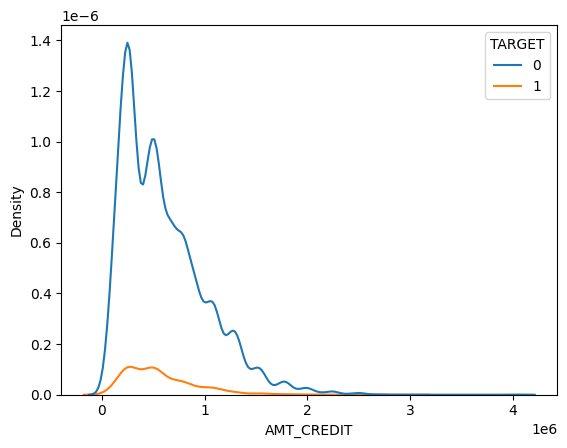

In [186]:
# visualize kdeplot

sns.kdeplot(data= num_data, x= "AMT_CREDIT", hue = "TARGET")

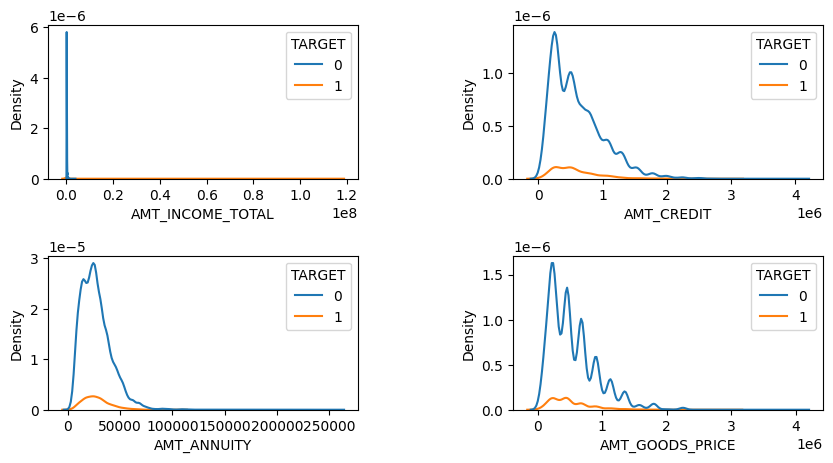

In [187]:
# genrate multiple kdeplot at once using for loop

plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=num_data, x=col, hue="TARGET")
  plt.subplots_adjust(wspace= 0.5, hspace=0.5)

**Bivarient Numerical**

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

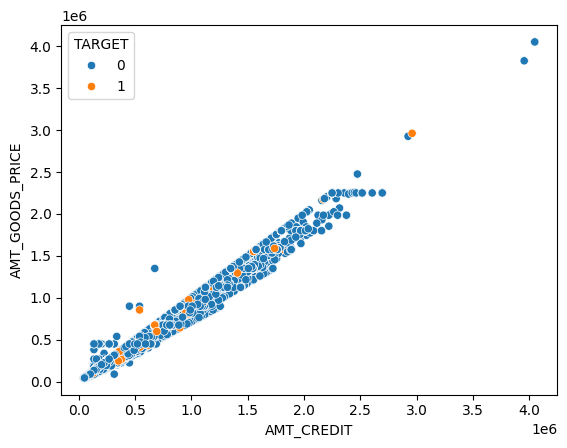

In [188]:
# visualize scatterplot

sns.scatterplot(data= num_data, x = "AMT_CREDIT", y = "AMT_GOODS_PRICE", hue = "TARGET")

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

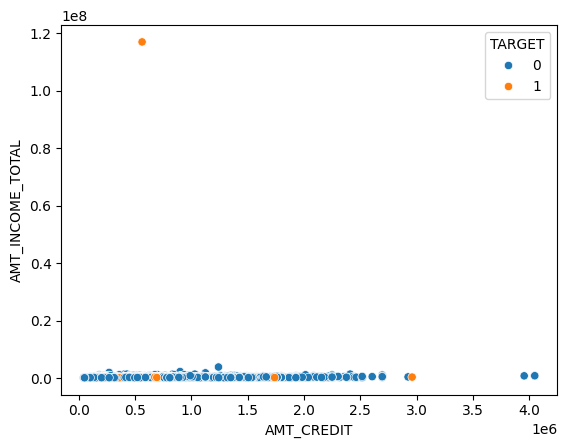

In [189]:
# visulaize scatterplot

sns.scatterplot(data= num_data, x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL", hue = "TARGET")

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

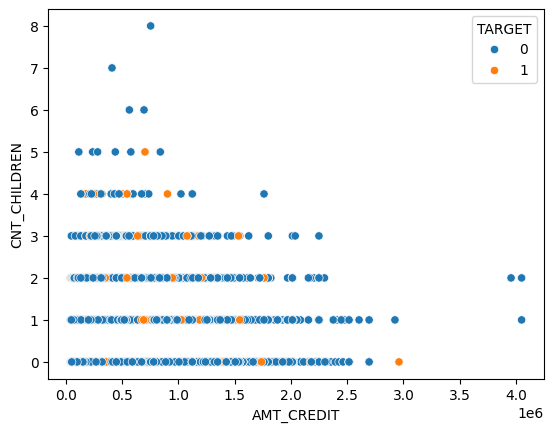

In [190]:
# visulaize scatterplot

sns.scatterplot(data= num_data, x = "AMT_CREDIT", y = "CNT_CHILDREN", hue = "TARGET")

In [191]:
# name table amt_var

amt_var = num_data[["AMT_INCOME_TOTAL",	"AMT_CREDIT",	"AMT_ANNUITY",	"AMT_GOODS_PRICE", "TARGET"]]

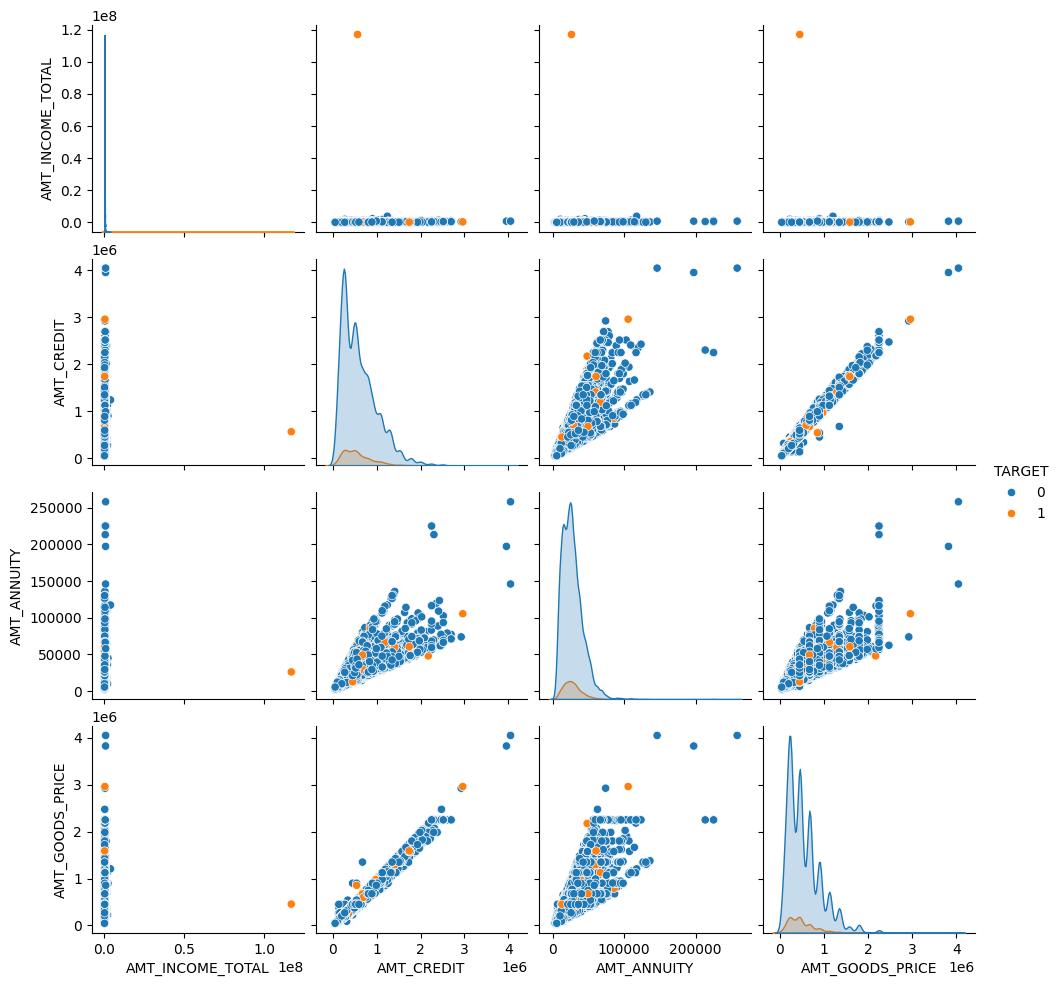

In [192]:
# visulaize pairplot

sns.pairplot(data= amt_var, hue= "TARGET")

Prev data

In [193]:
# find null value and renaming columns

null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape [0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})

# print
null_count

,var,count_pct
0,RATE_INTEREST_PRIVILEGED,99.667917
1,RATE_INTEREST_PRIMARY,99.667917
2,RATE_DOWN_PAYMENT,50.294968
3,AMT_DOWN_PAYMENT,50.293015
4,NAME_TYPE_SUITE,48.538834
5,NFLAG_INSURED_ON_APPROVAL,38.297000
6,DAYS_FIRST_DRAWING,38.297000
7,DAYS_FIRST_DUE,38.297000
8,DAYS_LAST_DUE_1ST_VERSION,38.297000
9,DAYS_LAST_DUE,38.297000


In [194]:
# find value greater than 40 count

var_mg4 = list(null_count[null_count["count_pct"]>= 40]["var"])

# print

var_mg4

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT',
 'NAME_TYPE_SUITE']

In [195]:
# privide table with value

nva_cols = var_mg4+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

# print

nva_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [196]:
# drop nva_cols

prev_app_ncr = prev_app.drop(nva_cols,axis=1)


# print length
len(prev_app_ncr.columns)

28

In [197]:
# top 5 rows

prev_app_ncr.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# find null value and sort data

prev_app_ncr.isnull().sum().sort_values(ascending=False)/prev_app_ncr.shape[0]* 100

NFLAG_INSURED_ON_APPROVAL    38.297000
DAYS_TERMINATION             38.297000
DAYS_LAST_DUE                38.297000
DAYS_LAST_DUE_1ST_VERSION    38.297000
DAYS_FIRST_DUE               38.297000
DAYS_FIRST_DRAWING           38.297000
AMT_GOODS_PRICE              21.501406
CNT_PAYMENT                  21.179090
AMT_ANNUITY                  21.177137
PRODUCT_COMBINATION           0.017581
NAME_PRODUCT_TYPE             0.001953
NAME_YIELD_GROUP              0.001953
NAME_SELLER_INDUSTRY          0.001953
SELLERPLACE_AREA              0.001953
CHANNEL_TYPE                  0.001953
NAME_PORTFOLIO                0.001953
NAME_GOODS_CATEGORY           0.001953
NAME_CLIENT_TYPE              0.001953
CODE_REJECT_REASON            0.001953
NAME_PAYMENT_TYPE             0.001953
DAYS_DECISION                 0.001953
NAME_CONTRACT_STATUS          0.001953
NAME_CASH_LOAN_PURPOSE        0.001953
SK_ID_CURR                    0.000000
AMT_CREDIT                    0.000000
AMT_APPLICATION          

In [199]:
# print aggregate value

prev_app_ncr['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      214509.847932
median    103500.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [200]:
# fill null value by median

prev_app_ncr['AMT_GOODS_PRICE_MEDIAN'] = prev_app_ncr['AMT_GOODS_PRICE'].fillna(prev_app_ncr['AMT_GOODS_PRICE'].median())

In [201]:
# fill null value by mean

prev_app_ncr['AMT_GOODS_PRICE_MEAN'] = prev_app_ncr['AMT_GOODS_PRICE'].fillna(prev_app_ncr['AMT_GOODS_PRICE'].mean())

In [202]:
# fill null value by mode

prev_app_ncr['AMT_GOODS_PRICE_MODE'] = prev_app_ncr['AMT_GOODS_PRICE'].fillna(prev_app_ncr['AMT_GOODS_PRICE'].mode()[0])

In [203]:
# create table by prividing value

gp_cols = ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE_MEDIAN', 'AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

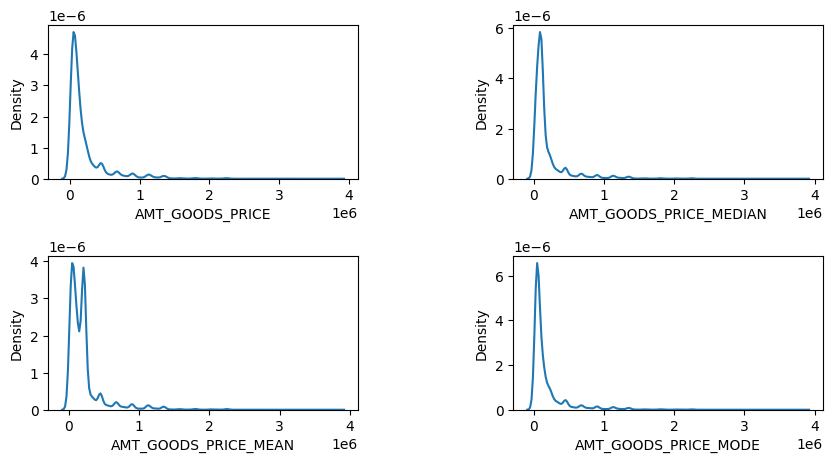

In [204]:
# visualize

plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data= prev_app_ncr, x=col)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [205]:
# fill null value by median

prev_app_ncr['AMT_GOODS PRICE'] = prev_app_ncr['AMT_GOODS_PRICE'].fillna (prev_app_ncr['AMT_GOODS_PRICE'].median())

In [206]:
# genrate aggregate value

prev_app_ncr['AMT_ANNUITY'].agg(func=['mean', 'median', 'max'])

mean       15442.80012
median     10849.86000
max       234478.39500
Name: AMT_ANNUITY, dtype: float64

In [207]:
# fill null value by median

prev_app_ncr ['AMT_ANNUITY']= prev_app_ncr ['AMT_ANNUITY'].fillna(prev_app_ncr ['AMT_ANNUITY'].median())

In [208]:
# fill null value by mode

prev_app_ncr['PRODUCT_COMBINATION'] = prev_app_ncr['PRODUCT_COMBINATION'].fillna (prev_app_ncr ['PRODUCT_COMBINATION'].mode()[0])

In [209]:
# find null value and sort data

prev_app_ncr[prev_app_ncr['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        8707
Refused         1292
Unused offer     842
dtype: int64

In [210]:
# fill null value

prev_app_ncr['CNT_PAYMENT']= prev_app_ncr['CNT_PAYMENT'].fillna(0)

In [211]:
# find null value and sort data

prev_app_ncr.isnull().sum().sort_values(ascending=False)

DAYS_FIRST_DRAWING           19605
DAYS_LAST_DUE_1ST_VERSION    19605
DAYS_LAST_DUE                19605
NFLAG_INSURED_ON_APPROVAL    19605
DAYS_TERMINATION             19605
DAYS_FIRST_DUE               19605
AMT_GOODS_PRICE              11007
NAME_GOODS_CATEGORY              1
NAME_YIELD_GROUP                 1
NAME_SELLER_INDUSTRY             1
SELLERPLACE_AREA                 1
NAME_PRODUCT_TYPE                1
NAME_PORTFOLIO                   1
CHANNEL_TYPE                     1
NAME_CLIENT_TYPE                 1
NAME_PAYMENT_TYPE                1
DAYS_DECISION                    1
NAME_CONTRACT_STATUS             1
NAME_CASH_LOAN_PURPOSE           1
CODE_REJECT_REASON               1
AMT_GOODS_PRICE_MEDIAN           0
AMT_GOODS_PRICE_MEAN             0
AMT_GOODS_PRICE_MODE             0
SK_ID_PREV                       0
PRODUCT_COMBINATION              0
CNT_PAYMENT                      0
SK_ID_CURR                       0
AMT_CREDIT                       0
AMT_APPLICATION     

In [212]:
# print length

len(prev_app_ncr.columns)

32

**Merge Data**

In [213]:
# merage tables

merge_df = pd.merge(app_rmv,prev_app_ncr, how ="inner",on = "SK_ID_CURR")

# top 5 rows
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_MEDIAN,AMT_GOODS_PRICE_MEAN,AMT_GOODS_PRICE_MODE,AMT_GOODS PRICE
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,365243.0,-834.0,-324.0,-354.0,-347.0,0.0,180000.0,180000.0,180000.0,180000.0
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,365243.0,-418.0,-88.0,-88.0,-84.0,0.0,98239.5,98239.5,98239.5,98239.5
2,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0,18720.0,18720.0,18720.0,18720.0
3,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,365243.0,-1396.0,-1246.0,-1246.0,-1243.0,0.0,132345.0,132345.0,132345.0,132345.0
4,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,225000.0,225000.0,225000.0,225000.0


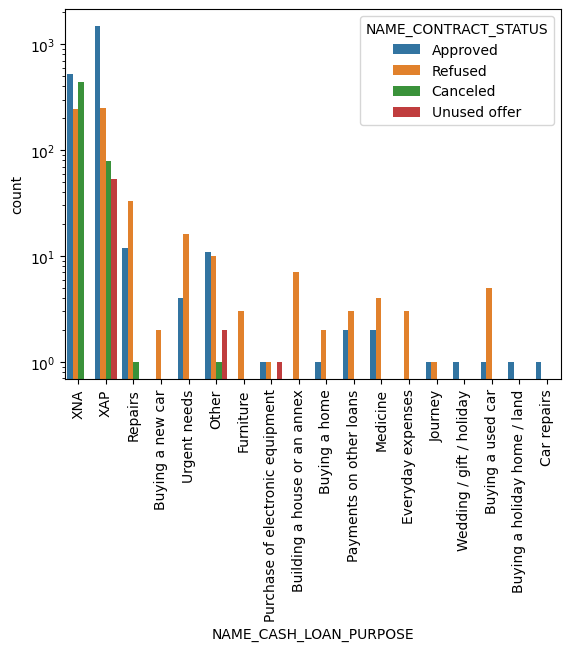

In [214]:
# visualize counterplot

sns.countplot(data= merge_df, x="NAME_CASH_LOAN_PURPOSE",hue = "NAME_CONTRACT_STATUS")
plt.xticks(rotation= 90)
plt.yscale("log")

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

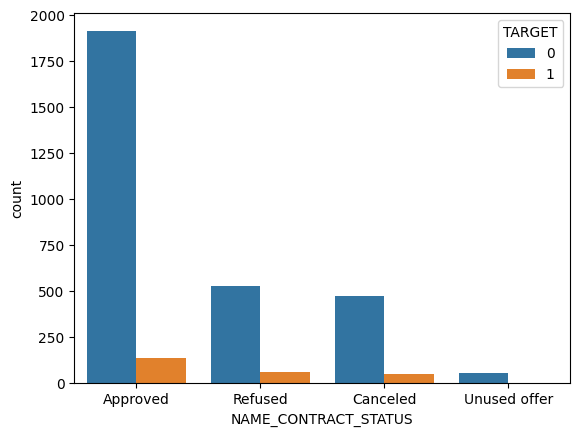

In [215]:
# visualize counterplot

sns.countplot(data= merge_df, x="NAME_CONTRACT_STATUS",hue="TARGET")

In [216]:
# merge tables

merge_df.groupby(["NAME_CONTRACT_STATUS","TARGET"]).size()

NAME_CONTRACT_STATUS  TARGET
Approved              0         1914
                      1          135
Canceled              0          473
                      1           46
Refused               0          524
                      1           60
Unused offer          0           55
                      1            1
dtype: int64

In [217]:
# groupby data adn rename column

merge_agg = merge_df.groupby(["NAME_CONTRACT_STATUS","TARGET"]).size().reset_index().rename(columns={0:"counts"})

In [218]:
# top 5 rows

merge_agg.head()

,NAME_CONTRACT_STATUS,TARGET,counts
0,Approved,0,1914
1,Approved,1,135
2,Canceled,0,473
3,Canceled,1,46
4,Refused,0,524


In [219]:
# sum of data

sum_df = merge_agg.groupby(["NAME_CONTRACT_STATUS"])["counts"].sum().reset_index()

In [220]:
# merge data from left

merge_agg2=pd.merge(merge_agg,sum_df, how="left", on ="NAME_CONTRACT_STATUS")

In [221]:
# round the value

merge_agg2["pct"] = round(merge_agg2["counts_x"]/merge_agg2["counts_y"]*100,2)

In [222]:
# print

merge_agg2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,1914,2049,93.41
1,Approved,1,135,2049,6.59
2,Canceled,0,473,519,91.14
3,Canceled,1,46,519,8.86
4,Refused,0,524,584,89.73
5,Refused,1,60,584,10.27
6,Unused offer,0,55,56,98.21
7,Unused offer,1,1,56,1.79


<ipython-input-223-2edbe57c85e6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= merge_df,x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL",ci=None,hue="TARGET")


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

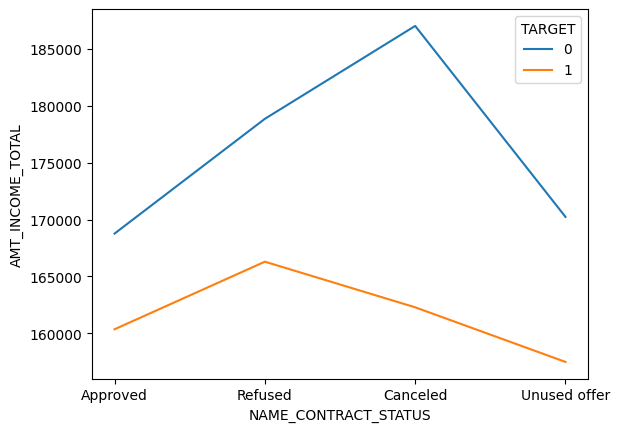

In [223]:
# visualize lineplot

sns.lineplot(data= merge_df,x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL",ci=None,hue="TARGET")

# **Conclusion | Findings**

### **Findings**

In [224]:
# Data Analysis

# 1)	Object Datatype

    # 1.	NAME_CONTRACT_TYPE- Most of the customers have taken cash loan customers who have taken cash loans are less likely to default

    # 2.	CODE_GENDER – Most of the loans have been taken by female default rate for females are just ~7% which is safer and lesser than male

    # 3.	NAME_TYPE_SUITE - Unaccompanied people had taken most of the loans and the default rate is ~8.5% which is still okay

    # 4.	NAME_INCOME TYPE – The safest segments are working, commercial associates and pensioners

    # 5.	NAME_EDUCATION_TYPE- Higher education is the safest segment to give the loan with a default rate of less than 5%

    # 6.	NAME_FAMILY_STATUS- Married people are safe to target, default rate is 8%

    # 7.	NAME_HOUSING_TYPE- People having house apartment are safe to give loan with default rate at 8%

    # 8.	OCCUPATION_TYPE- Low skilled labours and driver are highest defaulter and accountancy are less defaulter core staff, mangers and Laboral are safe to target with default rate of less than 8% -10%

    # 9.	WEEK_APPAR_PROCESS_START- Transport type 3 is highest defaulter, others, business entity type 3, self-employed are good to go with default rate of 10%

# 2)	Float64, int64

      # Univariate Numeric Variables Analysis

      # 1.	Most of the loans were given for the goods price ranging between 0 to 1 ml
      # 2.	Most of the loans were given for the credit amount of 0 to 1 ml
      # 3.	Most of the customers are paying annuity of 0 to 50k
      # 4.	Mostly the customers have income between 0 to 1 ml

      # Bivariate Analysis

      # 1.	AMT_CREDIT and AMT_GOODS PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
      # 2.	People having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, could turn out to be default we can target income below 1 million loan amounts greater than 1.5 million
      # 3.	People having children 1to 5 are safer to give loan
      # 4.	People who can pay annuity of 100k are more likely to get loan that upto less than 2 mill

      # Analysis on Merge data

      # 1.	For repairing purpose customer applied previously and it also has the greatest number of cancelations.
      # 2.	Most of applicant who were cancelled or refuse previously paid their loan in time
      # 3.	Previous offers which where unused have max number of default despite having high salary


### **Recomendation**

In [225]:
  # Recommendation

  # 1)	Bank should target the customers

      # 1.	Having low income i.e. Below 1 ml
      # 2.	Working in others, business entity types 3, self-employed org. Type
      # 3.	Working as accountants, core staff, managers and laborers
      # 4.	Having house/apartment and are married and having children not more than 5
      # 5.	Highly educated
      # 6.	Preferably female
      # 7.	Unaccompanied people can be safer - default rate is ~8.5%

  # 2)	Amount segment recommended

      # 1.	The credit amount should not be more than 1 ml
      # 2.	Annuity can be made of 50k (depending on the eligibility)
      # 3.	Income bracket could be below 1 ml
      # 4.	80-90% of the customer who were prev. Cancelled/refused, are repairers. Bank can do the analysis and can consider to give loan to these segments


### **Precautions**

In [226]:
  # Precautions

      # 1.	Org. Transport type 3 should be avoided
      # 2.	Low-skill labourers and drivers should be avoided
      # 3.	Offers previously unused and high-income customer should be avoided